<a href="https://colab.research.google.com/github/Sudo-CHRIS-dev/Prediction-of-Product-Sales/blob/main/Project_1_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Christian Bam

## Project Overview

## Load and Inspect Data

In [1]:
# Import required packages
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Save the filepath and load the data
fpath = '/content/sales_predictions_2023.csv'
df_sales = pd.read_csv(fpath)

In [3]:
# Display the info summary.
df_sales.info()
# Display the first 5 rows.
df_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [4]:
#1) How many rows and columns?
df_sales.shape

(8523, 12)

In [5]:
#2) What are the datatypes of each variable?
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
#3) Are there duplicates? If so, drop any duplicates.
df_sales.duplicated().sum()

#No duplicates, if there were I would use this to remove them
#(df_titanic = df_titanic.drop_duplicates())

0

In [7]:
#4) Identify missing values.
df_sales.isna().sum()/len(df_sales) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [8]:
#5) Address the missing values by using a placeholder value.
Missingobjcol = df_sales.select_dtypes('object').columns
df_sales[Missingobjcol] = df_sales[Missingobjcol].fillna("MISSING")

Missingnumcol = df_sales.select_dtypes('number').columns
df_sales[Missingnumcol] = df_sales[Missingnumcol].fillna(-1)

In [9]:
#6) Confirm that there are no missing values after addressing them.
df_sales.isna().sum()/len(df_sales) * 100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [10]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
#Find categories
objectcols = df_sales.select_dtypes('object').columns
df_sales[objectcols].nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [11]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

#We do not want to keep categorical features with so many categories.
df_sales = df_sales.drop(columns=['Item_Identifier'])

In [12]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
objectcols = df_sales.select_dtypes('object').columns
# loop through the list of string columns
for category in objectcols:
  # print the value counts for the column
  print(df_sales[category].value_counts())
  # Print an empty line for readability
  print()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Supermar

In [13]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
# Replace values in 'Item_Fat_Content' column
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
# Check the value counts again to confirm
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
# Replace values in 'Outlet_Size' column
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].replace({'High':'Large'})
# Check the value counts again to confirm
df_sales['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

In [15]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
df_sales.describe().loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

###Histograms

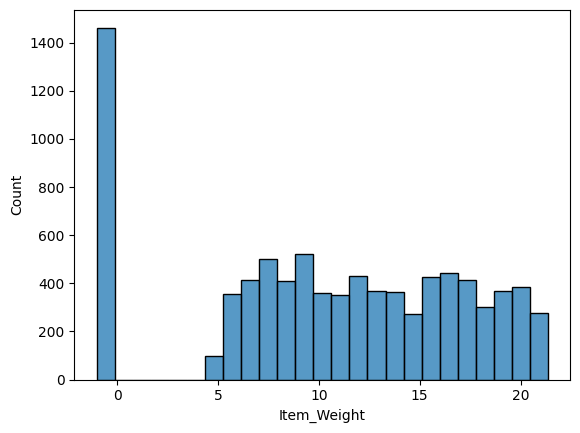

In [16]:
ax = sns.histplot(data = df_sales,
                  x='Item_Weight')

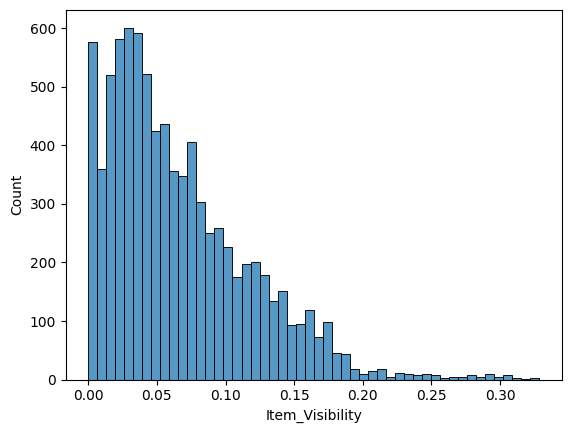

In [17]:
ax = sns.histplot(data = df_sales,
                  x='Item_Visibility')

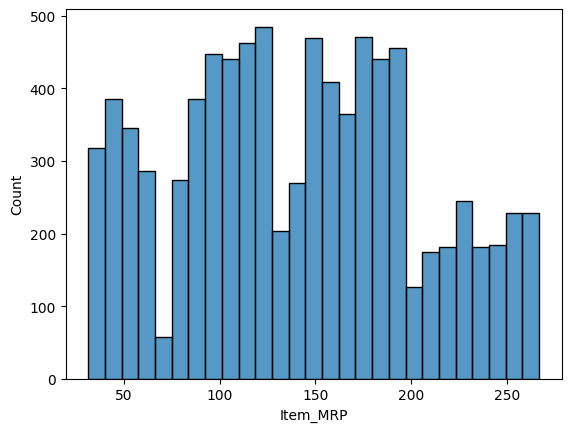

In [18]:
ax = sns.histplot(data = df_sales,
                  x='Item_MRP')

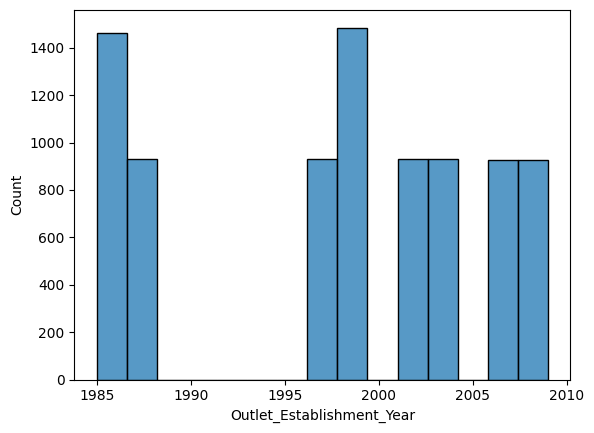

In [19]:
ax = sns.histplot(data = df_sales,
                  x='Outlet_Establishment_Year')

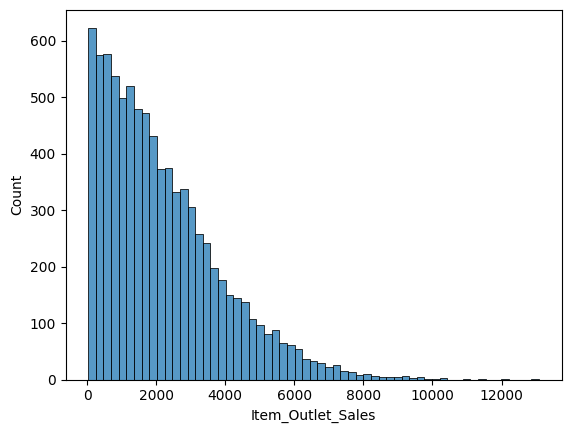

In [20]:
ax = sns.histplot(data = df_sales,
                  x='Item_Outlet_Sales')

###Boxplots

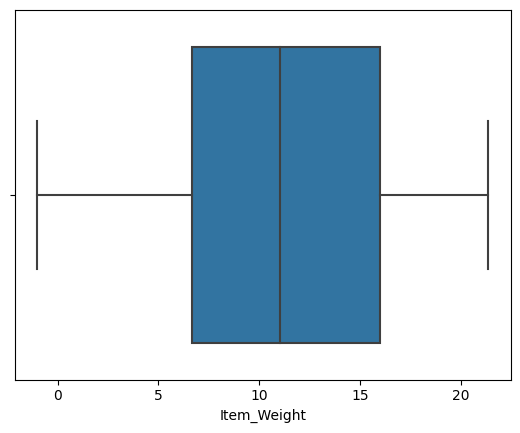

In [21]:
ax = sns.boxplot(x = 'Item_Weight', data = df_sales)

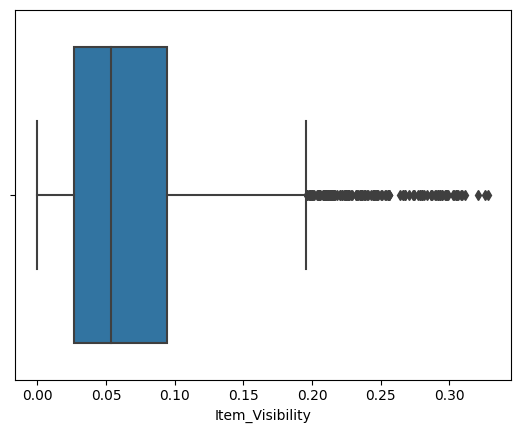

In [22]:
ax = sns.boxplot(x = 'Item_Visibility', data = df_sales)

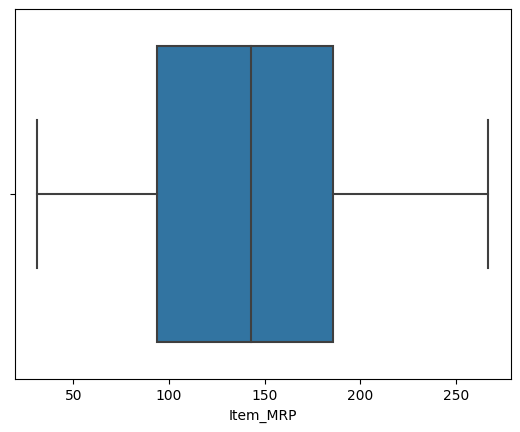

In [23]:
ax = sns.boxplot(x = 'Item_MRP', data = df_sales)

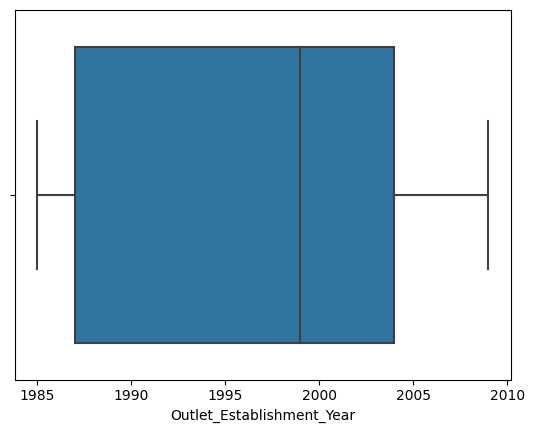

In [24]:
ax = sns.boxplot(x = 'Outlet_Establishment_Year', data = df_sales)

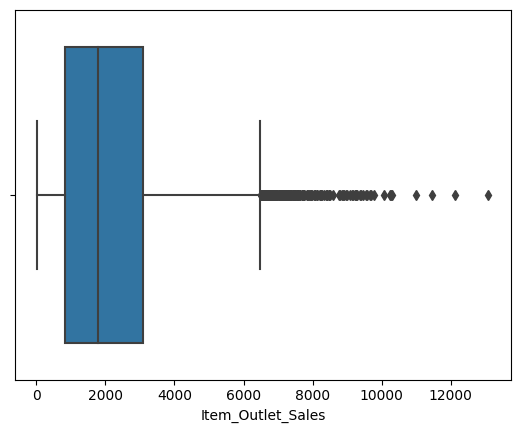

In [25]:
ax = sns.boxplot(x = 'Item_Outlet_Sales', data = df_sales)

### Countplots

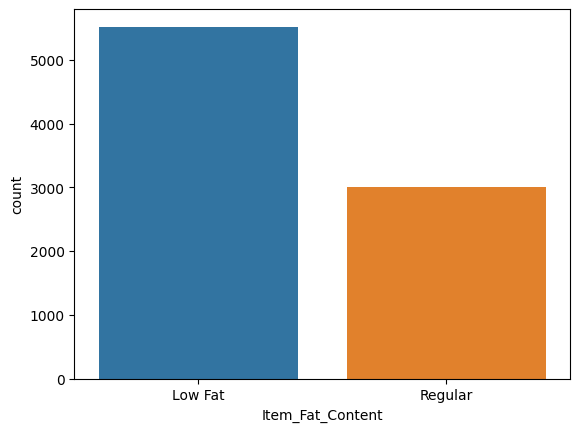

In [26]:
ax = sns.countplot(x = 'Item_Fat_Content', data = df_sales)

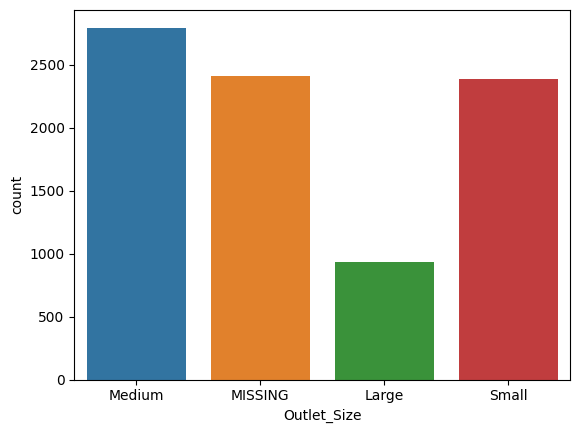

In [27]:
ax = sns.countplot(x = 'Outlet_Size', data = df_sales)

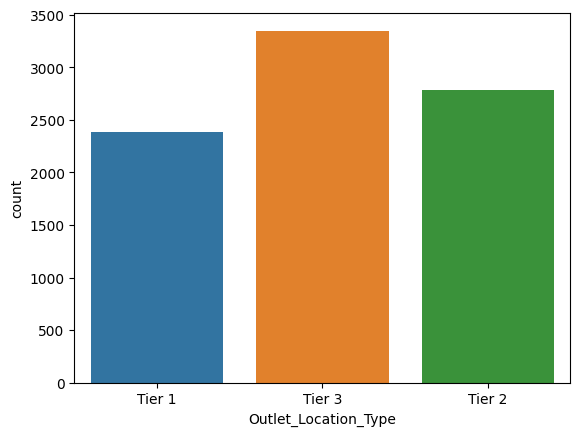

In [28]:
ax = sns.countplot(x = 'Outlet_Location_Type', data = df_sales)

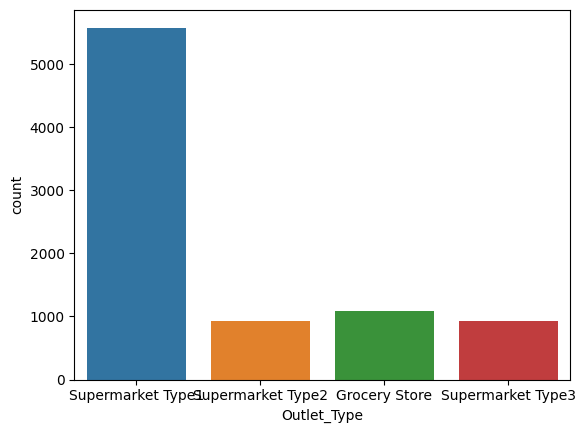

In [29]:
ax = sns.countplot(x = 'Outlet_Type', data = df_sales)

### Heatmap

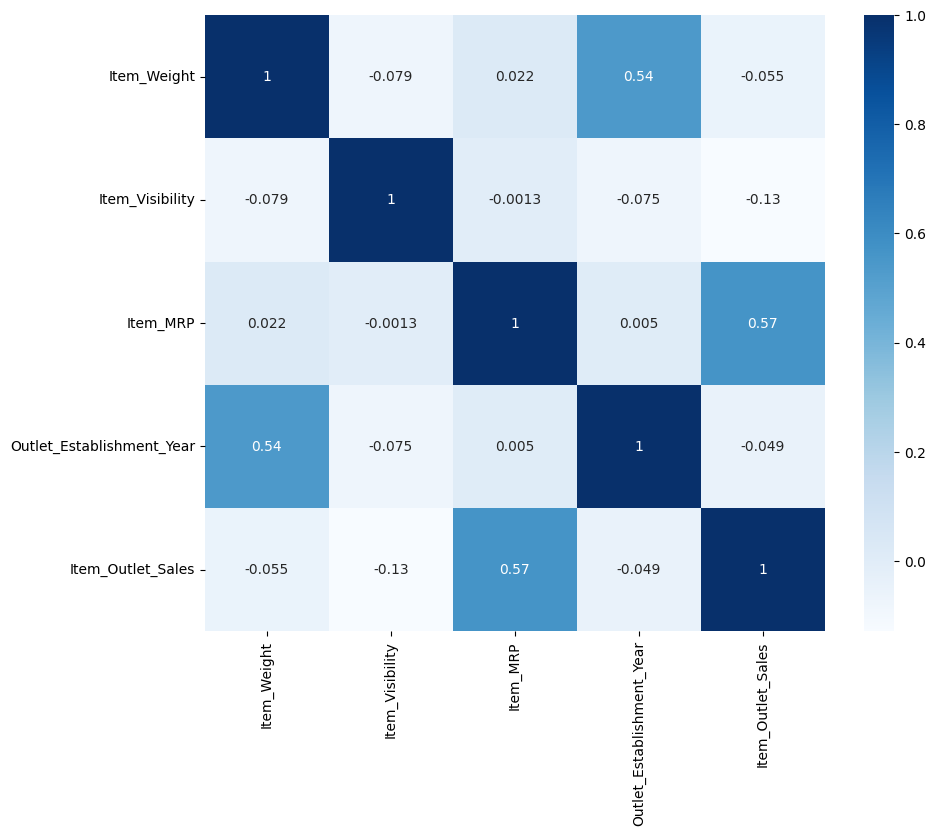

In [30]:
corr = df_sales.corr()
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(corr, cmap= 'Blues', annot = True);

## Explanatory Data Analysis

In [31]:
# First things first... Remove the placeholders you added in week 2 and replace them with null values.
df_sales = df_sales.replace({'MISSING':np.nan, -1:np.nan})

# Now let's make sure we have the same null values as before
df_sales.isna().sum()/len(df_sales) * 100

Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

### Sales of the product in the particular store. This is the target variable to be predicted.

### Create a univariate visualization showing the distribution of values/categories.

In [55]:
# Let's see what function we will need to use by identifying the feature
# Display the features datatype
feature = 'Item_MRP'
df_sales[feature].dtype

dtype('float64')

In [57]:
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


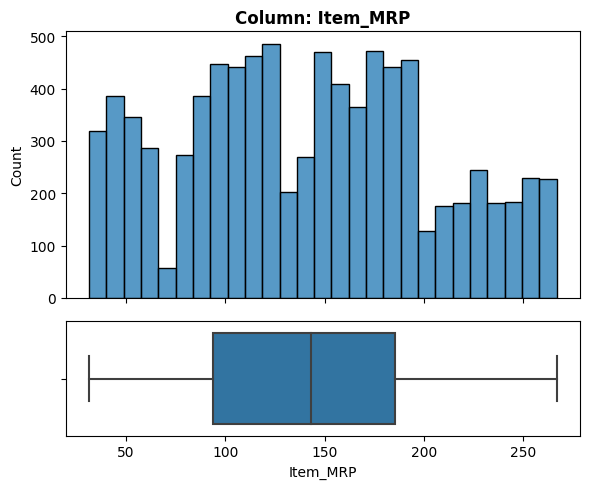

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [58]:
# Now that we have our function, let's go ahead and Create a univariate visualization showing the distribution of values/categories.
explore_numeric(df_sales, feature);

  1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
- Numeric

  2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
- 0 Null values, 0.0%. If there where null values I would impute the nulls with the mean value of the Item_MRP column,

  3. Is the feature constant or quasi-constant?
- quasi-constant.

  4. What is the cardinality? Is it high (>10)?
- 5938 unique values, it is high.

  5. Would we know this feature before the target is determined?
- Yes.

  6. Is there a business case/understanding reason to exclude based on our business case?
- No, there is not.

### Create a multivariate visualization plotting each feature vs. the target.

In [60]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

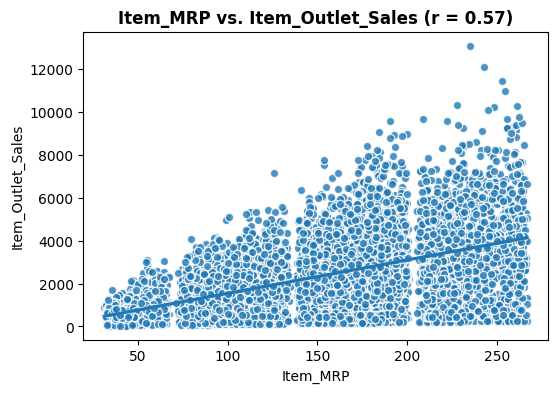

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

In [61]:
# Let's go ahead and generate our multivariate visualization
plot_numeric_vs_target(df_sales,feature)

 1. Based on your business understanding, would you expect this feature to be a predictor of the target?
- I would expect that this feature is a direct predictor of the target.

 2. Does this feature appear to be a predictor of the target?
- This feature does seem to be a predictor of Item Outlet Sales.